<h1 align=center><font size="4"> Bank Credit Card Customer Segmentation: Using K-Means unsupervised learning algorithm to identify groups of customers to enhance the marketing strategy</font></h1>

<h1 align=center><font size="2"> Author: Shahzaib S. Warraich </font></h1>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Loading the dataset</a></li>
        <li><a href="#evaluation">Data wrangling</a></li>
         <li><a href="#evaluation">Customer segmentation</a></li>
       
       
        
        
       
    
</div>
<br>
<hr>


<h2 id="load_dataset">1. Loading the dataset</h2>


|Field name|Description|
|--- |--- |
|CUSTID|Identification of Credit Card holder (Categorical)|
|BALANCE|Balance amount left in their account to make purchases |
|BALANCEFREQUENCY|How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)|
|PURCHASES|Amount of purchases made from account|
|ONEOFFPURCHASES|Maximum purchase amount done in one-go |
|INSTALLMENTSPURCHASES|Amount of purchase done in installment|
|CASHADVANCE| Cash in advance given by the user|
|PURCHASESFREQUENCY|How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
|ONEOFFPURCHASESFREQUENCY|How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)|
|PURCHASESINSTALLMENTSFREQUENCY|How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)|
|CASHADVANCEFREQUENCY|How frequently the cash in advance being paid|
|CASHADVANCETRX|Number of Transactions made with "Cash in Advanced"|
|PURCHASESTRX|Number of purchase transactions made|
|CREDITLIMIT|Limit of Credit Card for user|
|PAYMENTS|Amount of Payment done by user|
|MINIMUM_PAYMENTS| Minimum amount of payments made by user|
|PRCFULLPAYMENT |Percent of full payment paid by user|
|TENURE|Tenure of credit card service for user|


In [39]:
import pandas as pd
df=pd.read_csv("CC GENERAL.csv")
df.head(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


<h2 id="load_dataset">2. Data wrangling and exploratory data analysis </h2>

In [40]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [41]:
df.drop(['CUST_ID'], axis=1, inplace=True)


In [42]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [43]:
df.duplicated().sum()

0

In [44]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [45]:
df.shape

(8950, 17)

In [46]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [47]:
df.fillna({'CREDIT_LIMIT':4494,'MINIMUM_PAYMENTS':864}, inplace=True)
#examing changes
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<h2 id="load_dataset">3. Model training and evaluation</h2>

In [48]:
X= df.values
X[0:20]      

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, 0.00000000e+00,
        9.54000000e+01, 0.00000000e+00, 1.66667000e-01, 0.00000000e+00,
        8.33330000e-02, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        1.00000000e+03, 2.01802084e+02, 1.39509787e+02, 0.00000000e+00,
        1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.44294548e+03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.50000000e-01, 4.00000000e+00, 0.00000000e+00,
        7.00000000e+03, 4.10303260e+03, 1.07234022e+03, 2.22222000e-01,
        1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, 7.73170000e+02,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.20000000e+01,
        7.50000000e+03, 6.22066742e+02, 6.27284787e+02, 0.00000000e+00,
        1.20000000e+01],
       [1.66667054e+03, 6.36364000e-01, 1.49900000e+03, 1.499

In [49]:
from sklearn import preprocessing

#normalize data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-7.31989366e-01, -2.49434481e-01, -4.24899735e-01,
        -3.56934022e-01, -3.49078819e-01, -4.66785554e-01,
        -8.06490346e-01, -6.78660808e-01, -7.07313165e-01,
        -6.75348858e-01, -4.76069817e-01, -5.11333250e-01,
        -9.60433331e-01, -5.28978791e-01, -3.10964449e-01,
        -5.25550971e-01,  3.60679544e-01],
       [ 7.86960853e-01,  1.34324671e-01, -4.69551882e-01,
        -3.56934022e-01, -4.54576230e-01,  2.60560451e+00,
        -1.22175806e+00, -6.78660808e-01, -9.16995191e-01,
         5.73962722e-01,  1.10073852e-01, -5.91795877e-01,
         6.88639048e-01,  8.18642127e-01,  8.93133085e-02,
         2.34226897e-01,  3.60679544e-01],
       [ 4.47135132e-01,  5.18083823e-01, -1.07668230e-01,
         1.08888513e-01, -4.54576230e-01, -4.66785554e-01,
         1.26984323e+00,  2.67345108e+00, -9.16995191e-01,
        -6.75348858e-01, -4.76069817e-01, -1.09020117e-01,
         8.26061746e-01, -3.83804738e-01, -1.01660082e-01,
        -5.25550971e-01,  3.6

In [50]:
from sklearn.cluster import KMeans 
cost=[]
K=range(1,15)
for k in K: 
  k_means=KMeans(init = "k-means++",n_clusters = k, n_init = 12)
  k_means.fit(X)
  cost.append(k_means.inertia_)


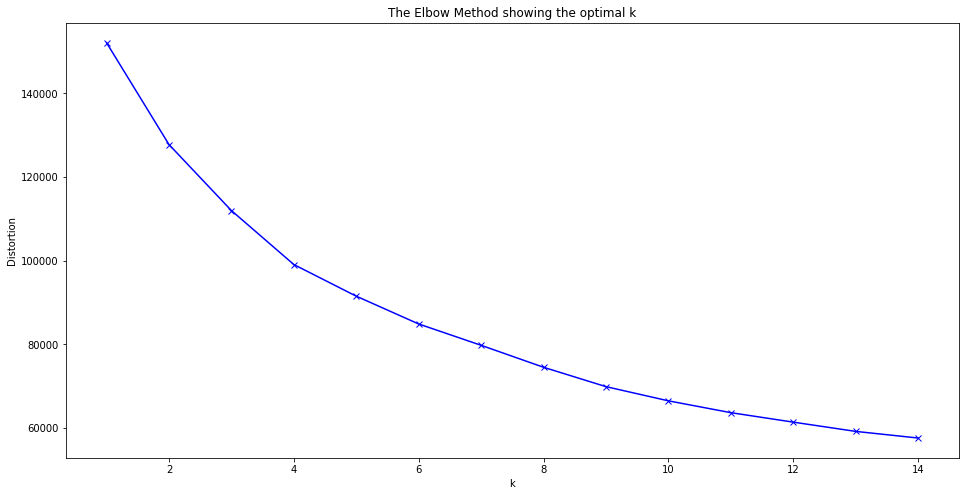

In [51]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

plt.figure(figsize=(16,8))
plt.plot(K, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [52]:
k_means = KMeans(init = "k-means++",n_clusters = 4 , n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels[0:20])

[2 1 0 2 2 0 3 0 2 2 0 2 0 0 2 1 2 2 0 0]


In [53]:
df["Segments"] = labels
df.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Segments
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.000000,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,3
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,2
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,2


In [54]:
df.groupby('Segments').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Segments,,,,,,,,,,,,,,,,,
0,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,650.229456,0.269313,11.594474
1,4602.795247,0.968389,502.252865,320.641328,181.696475,4522.139944,0.287762,0.139050,0.185532,0.484722,14.291562,7.664160,7549.502544,3483.325191,2008.759903,0.034888,11.386800
2,1012.641956,0.789977,270.095923,209.879852,60.482959,596.861466,0.170270,0.086280,0.080684,0.114922,2.126948,2.907743,3277.563432,975.304518,586.452782,0.077983,11.446707
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.813664,0.286707,11.951100


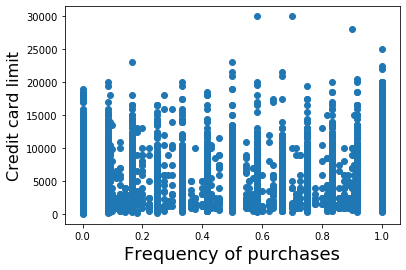

In [55]:

plt.scatter(df["PURCHASES_FREQUENCY"], df["CREDIT_LIMIT"])
plt.xlabel('Frequency of purchases', fontsize=18)
plt.ylabel('Credit card limit', fontsize=16)

plt.show()



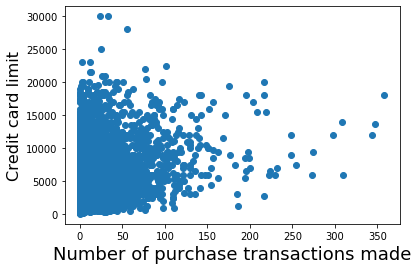

In [56]:
plt.scatter(df["PURCHASES_TRX"], df["CREDIT_LIMIT"])
plt.xlabel('Number of purchase transactions made', fontsize=18)
plt.ylabel('Credit card limit', fontsize=16)

plt.show()


<h1 align=center><font size="4"> The following are the four segmentations of credit card holders </font></h1>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">0-Low activity with low credit limit</a></li>
        <li><a href="#evaluation">1-High activity with low credit limit</a></li>
         <li><a href="#evaluation">2-Low activity with high credit limit</a></li>
         <li><a href="#evaluation">3-high activity with high credit limit</a></li>


In [57]:
df.to_csv("CC segmented.csv")